In [1]:
#@title Pauline van den Driessche et al 
# import python libraries
import numpy as np 
import pandas as pd 
import matplotlib as mlp 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import ewstools 
import random

In [2]:
type = 'forced'
model = 'COVID'
disease = 'COVID'
region = 'ED'

df_import = pd.read_csv(r'../data/empirical/output-COVID-ED-14.csv')

# df_import = df_import.fillna(0)

df_import

,output.I,t_start,t_end,Mean.R.,Std.R.,Quantile.0.025.R.,Quantile.0.05.R.,Quantile.0.25.R.,Median.R.,Quantile.0.75.R.,Quantile.0.95.R.,Quantile.0.975.R.
0,0,2.0,15.0,3.174208,0.428010,2.391248,2.504497,2.876005,3.154991,3.451471,3.909475,4.066350
1,0,3.0,16.0,2.641556,0.346853,2.005844,2.098073,2.400078,2.626390,2.866508,3.236775,3.363435
2,0,4.0,17.0,2.269656,0.288247,1.740132,1.817237,2.069165,2.257465,2.456863,2.763662,2.868444
3,3,5.0,18.0,2.137525,0.255483,1.666306,1.735355,1.960111,2.127355,2.303857,2.574389,2.666530
4,3,6.0,19.0,2.119922,0.235547,1.683524,1.747921,1.956655,2.111205,2.273689,2.521662,2.605854
...,...,...,...,...,...,...,...,...,...,...,...,...
1231,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1233,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_import['Time'] = range(0, len(df_import))
df_import.set_index(['Time'], inplace=True)

df_import

,output.I,t_start,t_end,Mean.R.,Std.R.,Quantile.0.025.R.,Quantile.0.05.R.,Quantile.0.25.R.,Median.R.,Quantile.0.75.R.,Quantile.0.95.R.,Quantile.0.975.R.
Time,,,,,,,,,,,,
0,0,2.0,15.0,3.174208,0.428010,2.391248,2.504497,2.876005,3.154991,3.451471,3.909475,4.066350
1,0,3.0,16.0,2.641556,0.346853,2.005844,2.098073,2.400078,2.626390,2.866508,3.236775,3.363435
2,0,4.0,17.0,2.269656,0.288247,1.740132,1.817237,2.069165,2.257465,2.456863,2.763662,2.868444
3,3,5.0,18.0,2.137525,0.255483,1.666306,1.735355,1.960111,2.127355,2.303857,2.574389,2.666530
4,3,6.0,19.0,2.119922,0.235547,1.683524,1.747921,1.956655,2.111205,2.273689,2.521662,2.605854
...,...,...,...,...,...,...,...,...,...,...,...,...
1231,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1233,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


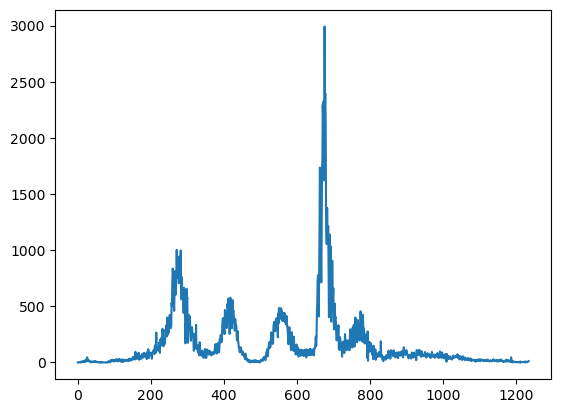

In [4]:
plt.plot(df_import[['output.I']])

In [5]:
df = df_import.copy()

# Replace NA with zero
df = df.fillna(0)

current_series = None
tem_time_count = []
all_series = []
k = 1

for i in range(len(df)):
    if df['Mean.R.'][i] < 1:
        tem_time_start = int(df['t_start'][i])
        tem_time_end = int(df['t_end'][i])
        tem_time_count.extend([tem_time_start, tem_time_end])
        current_series = df.loc[tem_time_count[0]-1:tem_time_count[-1]-1,['output.I']].copy()
        current_series.columns = [f'series-{k}']
    else:
        if current_series is not None:
            all_series.append(current_series)
            current_series = None 
            tem_time_count = []
            k += 1

if current_series is not None:
    all_series.append(current_series)


In [6]:
k

30

In [7]:
all_series[15] 

,series-16
Time,
959,66
960,62
961,71
962,77
963,57
964,49
965,68
966,41
967,69


In [8]:
all_series_index_reset = [df.reset_index() for df in all_series]
combined_sliced_series = pd.concat(all_series_index_reset, axis=1)
combined_sliced_series

# filepath='D:\EWS\Experiment\Empirical/flu-UK-sliched-series.csv' 
# combined_sliced_series.to_csv(filepath,
#                               index=True)

,Time,series-1,Time,series-2,Time,series-3,Time,series-4,Time,series-5,...,Time,series-26,Time,series-27,Time,series-28,Time,series-29,Time,series-30
0,23.0,9.0,106.0,23.0,161.0,81.0,273.0,818.0,359.0,70.0,...,1149.0,13.0,1152.0,22.0,1172.0,15.0,1177.0,11.0,NaN,NaN
1,24.0,17.0,107.0,11.0,162.0,55.0,274.0,753.0,360.0,75.0,...,1150.0,7.0,1153.0,19.0,1173.0,18.0,1178.0,12.0,NaN,NaN
2,25.0,38.0,108.0,26.0,163.0,59.0,275.0,814.0,361.0,103.0,...,1151.0,17.0,1154.0,21.0,1174.0,8.0,1179.0,14.0,NaN,NaN
3,26.0,46.0,109.0,27.0,164.0,34.0,276.0,791.0,362.0,101.0,...,1152.0,22.0,1155.0,22.0,1175.0,25.0,1180.0,21.0,NaN,NaN
4,27.0,20.0,110.0,10.0,165.0,52.0,277.0,706.0,363.0,87.0,...,1153.0,19.0,1156.0,12.0,1176.0,10.0,1181.0,16.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,NaN,NaN,NaN,NaN,NaN,NaN,356.0,109.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,357.0,88.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
sorted_sliced_series_num = 1
all_sorted_sliced_series = []

for j in range(1, k):
        
    df_short = all_series[j-1].dropna()
    df_short.columns = ['I']
#     df_cases = df_short[:-28]                     ##for null; we short 28 days; and length should greater than 28
    df_cases = df_short
    
    if len(df_cases) >= 56: 
        
        rw = 0.25                                    # rolling window
        span=0.2                                     # span for Lowess smoothing
        lags = [1]                                   # autocorrelation lag times
        ews = ['var','ac']

        var = 'I'

        # # Filter time-series to have time-spacing dt2
        # df_traj_filt = df_traj.loc[::int(dt2/dt)]         #deleting int(dt2/dt) rows inbetween of df_traj, taking time: 1,2,3...

        # set up a list to store output dataframes from ews_compute- we will concatenate them at the end
        appended_ews = []
        appended_pspec = []

        print('\nBegin EWS computation\n')
        for var in [var]:
            tem_series = df_cases[var]                            
            ews_dic = ewstools.core.TimeSeries(tem_series, 
                                              transition=None)
            ews_dic.detrend(method='Lowess', span=span)                                #dtrending data
            ews_dic.compute_auto(rolling_window=rw, lag=1)                             #computing AC
            ews_dic.compute_var(rolling_window=rw)                                     #computing VAR

            # The DataFrame of EWS
            z1 = ews_dic.state                                                         #storing state variabls of EWS
            z2 = ews_dic.ews                                                           #storing ac1, var of EWS
            df_ews_temp = pd.concat([z1, z2], axis=1)                                  #marging state variables, ac1, var 

            # Include a column in the DataFrames for realisation number and variable
            # df_ews_temp['tsid'] = i+1
            df_ews_temp['Variable'] = var
            
            df_ews_temp['tsid'] = sorted_sliced_series_num

            # Add DataFrames to list
            appended_ews.append(df_ews_temp)

            # # Print status every realisation
            # if np.remainder(i+1,1)==0:
            print('EWS for realisation complete-' + str(j))

        # Concatenate EWS DataFrames. Index [tsid, Variable, Time]
        df_ews = pd.concat(appended_ews).reset_index().set_index(['tsid','Variable','Time'])
        
        all_sorted_sliced_series.append(df_ews)
        all_sorted_sliced_series_dataframe = pd.concat(all_sorted_sliced_series)


        df_resids = df_ews.reset_index()[['Time','residuals']]
        filepath='../data/resids/resids_{}_{}{}.csv'.format(model, type, sorted_sliced_series_num)
        df_resids.to_csv(filepath,
                         index=False)
        
        filepath='../data/ews/df_ews_{}_{}.csv'.format(type, model)
        all_sorted_sliced_series_dataframe.to_csv(filepath,
                                                  index=True)
    
        sorted_sliced_series_num += 1
    
    


Begin EWS computation

EWS for realisation complete-1

Begin EWS computation

EWS for realisation complete-4

Begin EWS computation

EWS for realisation complete-6

Begin EWS computation

EWS for realisation complete-7

Begin EWS computation

EWS for realisation complete-9

Begin EWS computation

EWS for realisation complete-10

Begin EWS computation

EWS for realisation complete-22


In [11]:
all_sorted_sliced_series_dataframe

state  smoothing  residuals       ac1   variance
tsid Variable Time                                                  
1    I        23        9  22.832017 -13.832017       NaN        NaN
              24       17  21.417182  -4.417182       NaN        NaN
              25       38  19.926224  18.073776       NaN        NaN
              26       46  18.414321  27.585679       NaN        NaN
              27       20  16.963485   3.036515       NaN        NaN
...                   ...        ...        ...       ...        ...
7    I        1098     23  18.945792   4.054208 -0.304135  20.730002
              1099     21  18.572309   2.427691 -0.272789  19.936255
              1100     29  18.195670  10.804330 -0.180069  26.402675
              1101     14  17.790987  -3.790987 -0.290400  25.973657
              1102     11  17.312810  -6.312810 -0.212758  28.277004

[507 rows x 5 columns]

<Axes: xlabel='Time'>

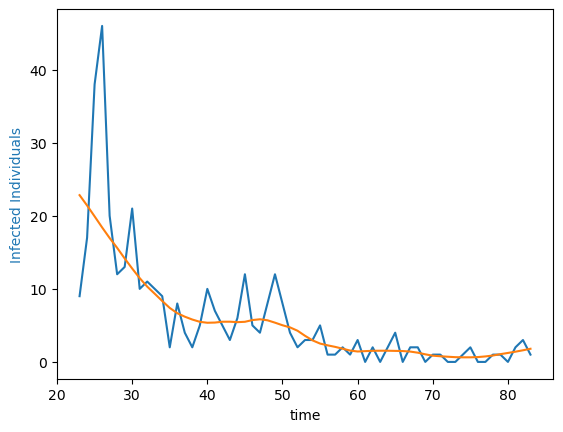

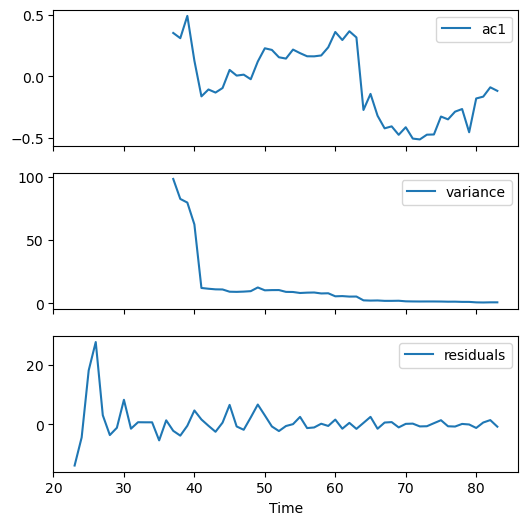

In [12]:
plot_num = 1

fig, ax1 = plt.subplots() 

color = 'tab:blue' 

ax1.plot(all_sorted_sliced_series_dataframe.sort_index().loc[plot_num, var][['state','smoothing']])
ax1.set_xlabel('time')
ax1.set_ylabel('Infected Individuals', color = color)

# ax2.plot(t, beta, color=color) 

fig1, axes = plt.subplots(nrows=3, ncols=1, figsize=(6,6), sharex=True)
all_sorted_sliced_series_dataframe.sort_index().loc[plot_num, var]['ac1'].plot(ax=axes[0],legend=True)
all_sorted_sliced_series_dataframe.sort_index().loc[plot_num, var]['variance'].plot(ax=axes[1],legend=True)
all_sorted_sliced_series_dataframe.sort_index().loc[plot_num, var]['residuals'].plot(ax=axes[2],legend=True)